In [ ]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util
from tf_unet import image_util

In [30]:
generator = image_util.ImageDataProvider('./out/*[_img,_segmentation].tif', data_suffix=u'_img.tif', mask_suffix=u'_segmentation.tif')
train_data, labels = generator._next_data()
print(generator.data_files[generator.file_idx])

net = unet.Unet(channels=generator.channels, n_class=generator.n_class, layers=4, features_root=20)
print(net.offset)
x_test, y_test = generator(10)

TypeError: __init__() got an unexpected keyword argument 'cost'

In [20]:
!ls ../../unet_models/unet_train_all/unet_trained

ls: cannot access '../../unet_models/unet_train_all/unet_trained': No such file or directory


In [21]:
prediction = net.predict("../../unet_models/train0_4_20_adam/unet_trained/model.cpkt", x_test)
print(prediction.shape)
print(x_test.shape)

2017-03-24 07:13:21,655 Model restored from file: ../../unet_models/train0_4_20_adam/unet_trained/model.cpkt


(10, 164, 164, 2)
(10, 256, 256, 3)


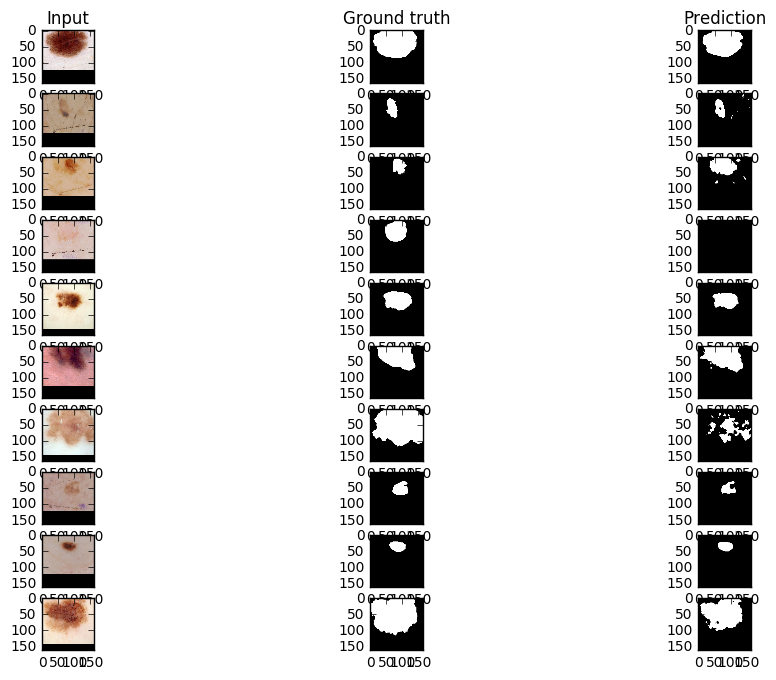

In [27]:
data = util.crop_to_shape(x_test, prediction.shape)
labels = util.crop_to_shape(y_test, prediction.shape)

fig, ax = plt.subplots(10, 3, figsize=(12,8))
for i in range(ax.shape[0]):
    ax[i, 0].imshow(data[i,...])
    ax[i, 1].imshow(labels[i,...,1], cmap='gray')
    mask = prediction[i,...,1] > 0.5
    ax[i, 2].imshow(mask, cmap='gray')
ax[0, 0].set_title("Input")
ax[0, 1].set_title("Ground truth")
ax[0, 2].set_title("Prediction")
#fig.savefig("docs/toy_problem.png")